In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from scipy.stats.mstats import mquantiles
from scipy.stats import beta
from scipy.stats import linregress

In [2]:
tools = 'plink'

if tools == 'plink':
    p,bp,chr_name = 'P','BP','CHR'
elif tools == 'freq':
    p,bp,chr_name = 'frequentist_add_pvalue','position','chromosome'
elif tools == 'bayes':
    p,bp,chr_name = 'bayesian_add_log10_bf','position','alternate_ids'
else:
    p,bp,chr_name = 'p','bp','Chr'

In [3]:
path = '/f/mulinlab/jianhua/finemap_test/PH-277.txt'
with open(path,'r') as f:
    nskip = 0
    for line in f:
        if line.startswith('#'):
            nskip += 1
        else:
            break

In [190]:
info = pd.read_csv('/f/mulinlab/jianhua/chimgen/asso_test/plink_maf_0.01_info_0.9.txt',sep='\t')

In [4]:
alldf = pd.read_csv(path,skiprows=nskip,delim_whitespace=True)

In [5]:
alldf = alldf[alldf[p].notnull()]
alldf[chr_name] = alldf[chr_name].astype(int)

In [193]:
alldf = alldf.merge(info,on='SNP',how='inner')

In [7]:
alldf[alldf[chr_name]==22]

,CHR,BP,rsID,NEA,EA,BETA,SE,P,Zscore
2551933,22,16055070,rs4389403,G,A,-0.0646,0.0333,0.0754,-1.939940
2551934,22,16055171,rs12628452,G,A,-0.0099,0.1142,0.9300,-0.086690
2551935,22,16061016,rs9617528,T,C,0.0126,0.0117,0.4880,1.076923
2551936,22,16504399,rs4911642,C,T,0.0191,0.0329,0.5430,0.580547
2551937,22,16851640,rs5748589,C,T,-0.0437,0.0599,0.4670,-0.729549
2551938,22,16855274,rs5748869,G,A,-0.0432,0.0591,0.4670,-0.730964
2551939,22,16855476,rs5748880,A,G,-0.0432,0.0591,0.4670,-0.730964
2551940,22,16855618,rs5747010,G,A,-0.0431,0.0590,0.4670,-0.730508
2551941,22,16856188,rs5747020,T,C,-0.0432,0.0591,0.4670,-0.730964
2551942,22,16858253,rs5747108,A,G,-0.0550,0.0803,0.4950,-0.684932


In [8]:
def qq(data,ax,color):
    xmax = 0
    ymax = 0
    alpha = 0.9
    color = '#000000'
    n_quantiles = 100

    q_pos = np.concatenate([
        np.arange(99.) / len(data),
        np.logspace(-np.log10(len(data)) + 2, 0, n_quantiles)
    ])

    q_data = mquantiles(data, prob=q_pos, alphap=0, betap=1, limit=(0, 1))
    q_th = q_pos.copy()
    q_err = np.zeros([len(q_pos), 2])
    for i in range(0, len(q_pos)):
        q_err[i, :] = q_err[i, :] = beta.interval(
            alpha,
            len(data) * q_pos[i],
            len(data) - len(data) * q_pos[i])

    q_err[i, q_err[i, :] < 0] = 1e-15
    slope, intercept, r_value, p_value, std_err = linregress(q_th, q_data)
    xmax = np.max([xmax, -np.log10(q_th[1])])
    ymax = np.max([ymax, -np.log10(q_data[0])])

    ax.plot(
        -np.log10(q_th[n_quantiles - 1:]),
        -np.log10(q_data[n_quantiles - 1:]),
        '-',
        color=color)
    ax.plot(
        -np.log10(q_th[:n_quantiles]),
        -np.log10(q_data[:n_quantiles]),
        '.',
        color=color,
        label='gf')
    ax.plot([0, xmax], [0, xmax], '--k',color='#f42e30')
    ax.fill_between(
        -np.log10(q_th),
        -np.log10(q_err[:, 0]),
        -np.log10(q_err[:, 1]),
        color=color,
        alpha=0.1,
    )

In [9]:
def manhattan(df,ax):
    df[p] = -np.log10(df[p])
    df = df.sort_values(chr_name)
    df_grouped = df.groupby((chr_name))

    colors = ['#1A1A1A','#999999',]
    x_labels = []
    x_labels_pos = []
    end = 1000
    for num, (name, group) in enumerate(df_grouped):
        group[bp] = group[bp] + end
        end = group[bp].max() + 1000
        ax.scatter(group[bp], group[p],c=colors[num % len(colors)],s=1)
        x_labels.append(name)
        x_labels_pos.append(group[bp].mean())
    ax.axhline(y=-np.log10(5e-8), color='#2222FF', linestyle='-')
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
#     print(df.loc[0,bp]-len(df)*0.1,end+len(df)*0.1)
#     ax.set_ylim([-0.5, df[p].max()*1.05])

/f/mulinlab/jianhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less
/f/mulinlab/jianhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/f/mulinlab/jianhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/f/mulinlab/jianhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/f/mulinlab/jianhua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


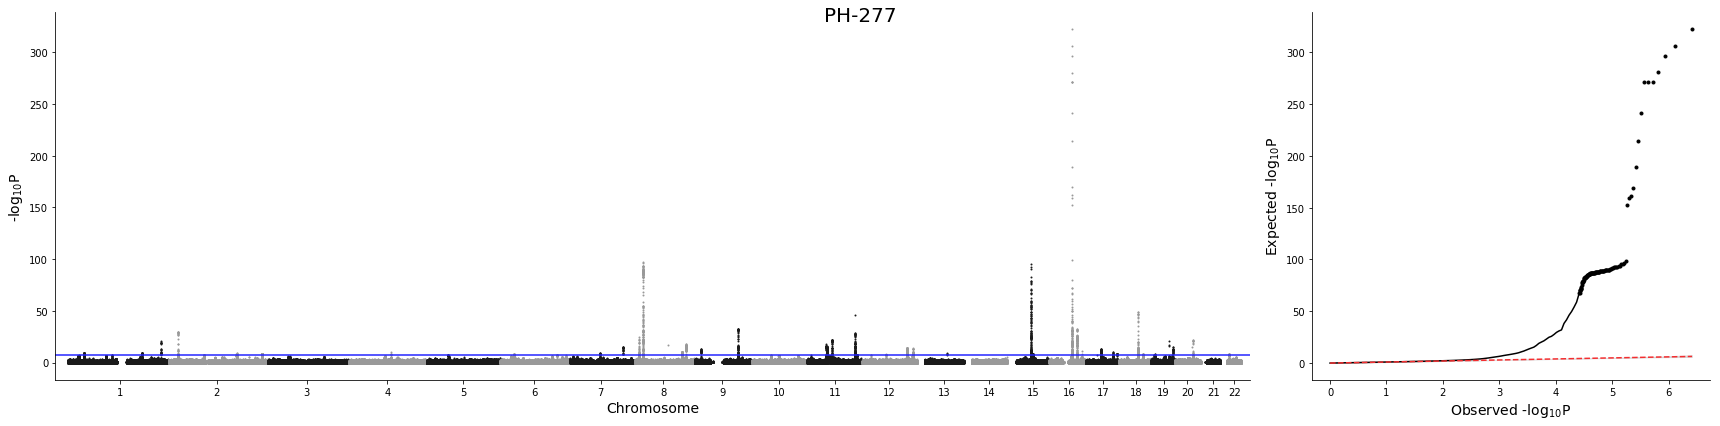

In [10]:
df = alldf.copy()
figure_tile = 'PH-277'
fig = plt.figure(figsize=(24, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
qq(df[p], ax1, 'b')
manhattan(df,ax0)
ax0.set_xlim(left=-3e7,right=2.9e9)
ax0.set_xlabel('Chromosome', fontsize=14)
ax0.set_ylabel('-$\mathregular{log_{10}}$P', fontsize=14)
ax1.set_xlabel('Observed -$\mathregular{log_{10}}$P', fontsize=14)
ax1.set_ylabel('Expected -$\mathregular{log_{10}}$P', fontsize=14)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
fig.suptitle(figure_tile, fontsize=20)
fig.tight_layout()
fig.savefig('{}_Manhattan_QQ.png'.format(figure_tile), dpi=300)

In [192]:
df[df[p]>=-np.log10(5e-8)].to_csv('5e-8.csv',index=False)

In [15]:
bim = pd.read_csv('/f/mulinlab/jianhua/chimgen/gwas-pipeline/output/08/all5024_plink_forward-nd-c-c.bim',delim_whitespace=True,names=range(6))

In [16]:
bim[0].value_counts()

2     45801
1     45176
6     39967
3     38551
4     35605
5     32849
7     30494
10    28545
11    28226
12    26991
8     26678
23    22490
9     21535
13    19211
16    19070
14    18122
17    17882
15    17747
18    16513
19    15032
20    13600
22     8961
21     8200
24     2272
26      715
Name: 0, dtype: int64